# Visualización de Datos Avanzada

## Objetivo
- Realizar nuevos tipos de gráficas que nos ayuden a explorar y entender mejor nuestros datos.
- Estilizar nuestras gráficas para que sean agradables a la vista y llamen la atención.

En este notebok se presentaran nuevas y formas no tan comunes de visualizar nuestros datos, ya que teniendo graficos los datos son mas fáciles de interpretar que teniendo solo el conjunto de datos.

Utilizaremos 
- Treemaps
- Scatterplots
- Binnings Hexagonales
- Gráficas de barras apiladas

## Carga general de datos

Para generar nuestros gráficos, utilizaremos las siguientes librerias:

In [1]:
# Se cargan las librerias necesarias
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# cargamos nuestro dataset
df = pd.read_csv('../Datasets/DatosPM_Zona.csv', index_col=0)
df.head()

,Date,Year,Month,Zone,PD_PM10,Max_PM10,Min_PM10,Indice_PM10,Clase_PM10,PD_PM25,Max_PM25,Min_PM25,Indice_PM25,Clase_PM25
0,2019-03-01,2019,3,CE,56.0,101.0,23.0,72.618,Regular,27.0,55.0,8.0,33.750,Buena
1,2019-03-01,2019,3,NE,81.0,161.0,37.0,102.775,Mala,32.2,62.0,1.0,40.250,Buena
2,2019-03-01,2019,3,NO,63.0,112.0,21.0,82.706,Regular,35.1,61.0,12.0,43.875,Buena
3,2019-03-01,2019,3,SE,56.0,111.0,8.0,72.618,Regular,24.4,47.0,6.0,30.500,Buena
4,2019-03-01,2019,3,SO,38.0,85.0,3.0,47.500,Buena,20.3,44.0,1.0,25.375,Buena


In [3]:
df.dtypes

Date            object
Year             int64
Month            int64
Zone            object
PD_PM10        float64
Max_PM10       float64
Min_PM10       float64
Indice_PM10    float64
Clase_PM10      object
PD_PM25        float64
Max_PM25       float64
Min_PM25       float64
Indice_PM25    float64
Clase_PM25      object
dtype: object

Despues de identificar las variables con posibles tados jeracquicos, podemos proceder a graficar pasando esas variables para poder visualizar de mejor manera esas jerarquias entrer variables que son muy importantes.
***

### Treemaps

In [4]:
fig = px.treemap(df, path=['Year', 'Month', 'Zone'], values='PD_PM10',
                  color='PD_PM10', hover_data=['PD_PM10'],
                  color_continuous_scale='RdBu')
fig.show()

Como se puede observar en el anterior treemap vemos que los valores mas altos de $PM_{10}$ se encuentrar en el año 2019 como es de esperarse, tambien se observa que para los dos años la concentracion de este contaminante se encuentra en las zonas NE y SE.

In [5]:
fig = px.treemap(df, path=['Year', 'Month', 'Zone'], values='PD_PM25',
                  color='PD_PM25', hover_data=['PD_PM25'],
                  color_continuous_scale='RdBu')
fig.show()

Para el anterior treemap observamos que los valores más altos de $PM_{2.5}$ se encuentra en el año 2019 como es de esperarse, además que, para este contaminante la mayor parte de su concentración en las zonas NE y NO.
***

### Scatterplots
Realizamos una grafica para poder ver si tenemos alguna relación entre el indice de $PM_{10}$ y $PM_{2.5}$ para el año 2019 de acuerdo a cada Zona

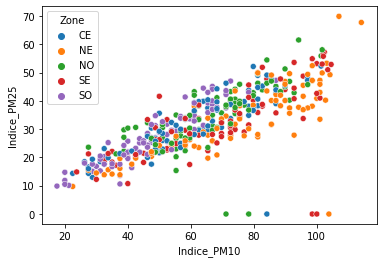

In [6]:
df_2019 = df[df["Year"] == 2019]
sns.scatterplot(data=df_2019, x="Indice_PM10", y="Indice_PM25", hue='Zone');

Realizamos una grafica para poder ver si tenemos alguna relación entre el indice de $PM_{10}$ y $PM_{2.5}$ para el año 2020 de acuerdo a cada Zona

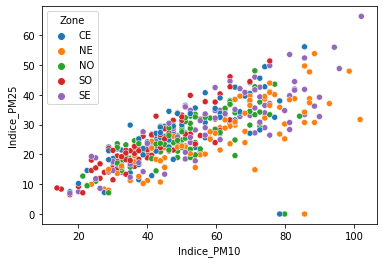

In [7]:
df_2020 = df[df["Year"] == 2020]
sns.scatterplot(data=df_2020, x="Indice_PM10", y="Indice_PM25", hue='Zone');

### Binnings Hexagonales
Con los binnings hexagonales podemos observas con mayor claridad la distribucion de nuestros datos ya que con la ayuda de los histogramas en la parte superios y aun lado podemos ver tambien la distribucion de las variables que se analizan.

<Figure size 1080x720 with 0 Axes>

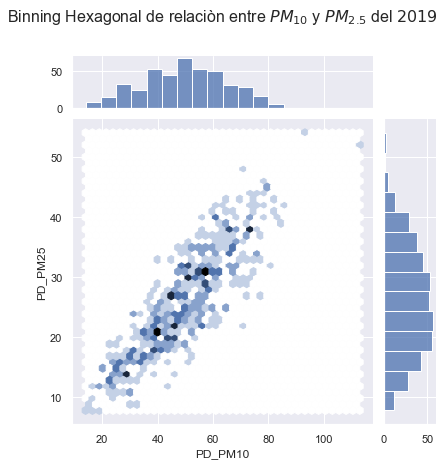

In [8]:
df_2019 = df[df["Year"] == 2019]

sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
ax = sns.jointplot(x='PD_PM10', y='PD_PM25', data=df_2019, kind='hex', ratio=5, joint_kws={'gridsize': 40}, marginal_ticks=True);
plt.title('Binning Hexagonal de relaciòn entre $PM_{10}$ y $PM_{2.5}$ del $2019$', y=1.3, fontsize = 16);

Como podemos observar en el anterior gráfico podemos ver que la presencia es mayor para el contaminante $PM_{10}$ para el 2019 y de la misma forma para el siguiente año.

<Figure size 1080x720 with 0 Axes>

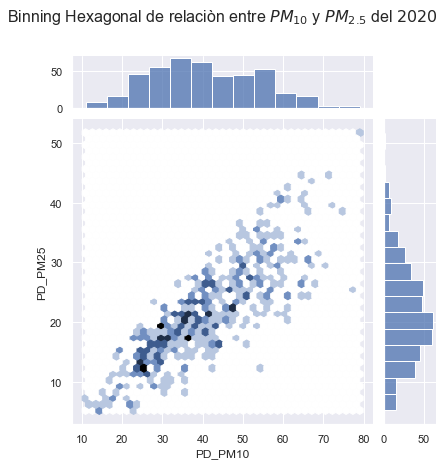

In [9]:
df_2020 = df[df["Year"] == 2020]

sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
ax = sns.jointplot(x='PD_PM10', y='PD_PM25', data=df_2020, kind='hex', ratio=5, joint_kws={'gridsize': 40}, marginal_ticks=True);
plt.title('Binning Hexagonal de relaciòn entre $PM_{10}$ y $PM_{2.5}$ del $2020$', y=1.3, fontsize = 16);

### Gráficas de barras apiladas

Con esta tipo de graficas podresmos explorar una o varias variables numericas que se pueden agrupar en dos niveles por alguna variable categorica.

In [10]:
# Agrupamos el promedio diaris para los dos contaminantes. segun la zona
df19mean = df_2019.groupby('Zone')[['PD_PM10', 'PD_PM25']].mean()
df20mean = df_2020.groupby('Zone')[['PD_PM10', 'PD_PM25']].mean()

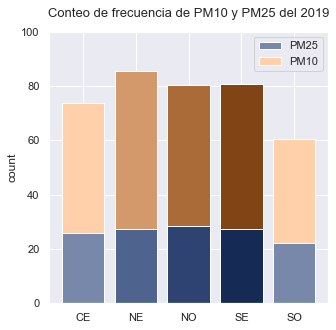

In [11]:
sns.set(style="darkgrid")

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

plt1 = ax.bar(df19mean.index, df19mean['PD_PM25'], label='PD_PM25',
              color=["#7788AA","#4E638E","#2E4372","#152A55"])
plt2 = ax.bar(df19mean.index, df19mean['PD_PM10'], bottom=df19mean['PD_PM25'],
              color=["#FFD0AA", "#D4996A", "#AA6B39", "#804415"])

ax.set_ylabel('count')
ax.set_title('Conteo de frecuencia de PM10 y PM25 del 2019', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]), ('PM25', 'PM10'));
ax.set_ylim(0, 100);

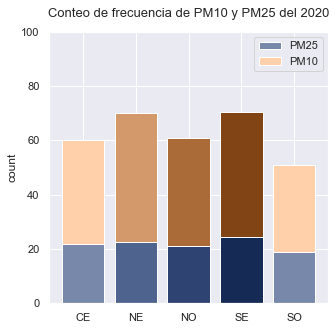

In [12]:
sns.set(style="darkgrid")

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

plt1 = ax.bar(df20mean.index, df20mean['PD_PM25'], label='PD_PM25',
              color=["#7788AA","#4E638E","#2E4372","#152A55"])
plt2 = ax.bar(df20mean.index, df20mean['PD_PM10'], bottom=df20mean['PD_PM25'],
              color=["#FFD0AA", "#D4996A", "#AA6B39", "#804415"])

ax.set_ylabel('count')
ax.set_title('Conteo de frecuencia de PM10 y PM25 del 2020', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]), ('PM25', 'PM10'));
ax.set_ylim(0, 100);

Con las anteriores visualizaciones se puede ver con claridad la dispersión que existen entre los contaminantes de acuerdo a la zona donde se localice, como también cuál contaminante predomina en esa zona